# Lecture Challenges

## 1. Generate a sequence of N Fibonacci numbers
The Fibonacci numbers are the numbers in the following integer sequence, called the Fibonacci sequence, and characterized by the fact that every number in it is the sum of the two preceding ones:

`0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ...`

https://en.wikipedia.org/wiki/Fibonacci_number

<img src="https://upload.wikimedia.org/wikipedia/commons/d/db/34%2A21-FibonacciBlocks.png" width=200px>

In [5]:
N = 50
fib  = [0,1]
for ii in range(1,N):
    i1 = fib[ii]
    i2 = fib[ii-1]
    fib.append(i1+i2)
print(fib)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025]


## 2. Write a program to determine if two integers are coprime

Two numbers are co-prime if they have no common factors

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Coprime8.svg/500px-Coprime8.svg.png" width=200px>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


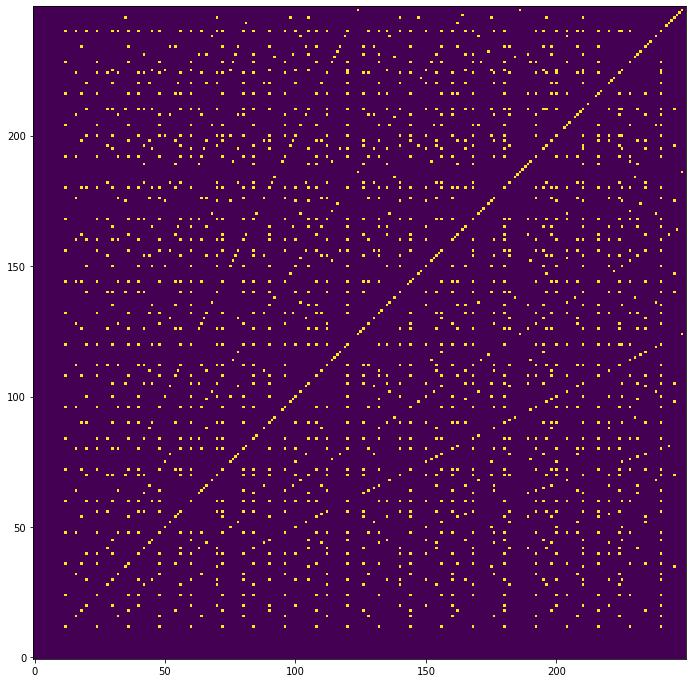

In [16]:
def coprime_check(num1, num2):
#     num1 = int(input('num1 = '))
#     num2 = int(input('num2 = '))

    fact1 = []
    fact2 = []
    for ii in range(4,num1+1):
        mod1 = num1 % ii
        if mod1 == 0:
            fact1.append(ii)
    for ii in range(4,num2+1):
        mod2 = num2 % ii
        if mod2 == 0:
            fact2.append(ii)
#     print(f'factors of num1: {fact1}')
#     print(f'factors of num2: {fact2}')
    com_fact = False
    for ii in range(2,len(fact1)):
        for jj in range(2,len(fact2)):
            if fact1[ii] == fact2[jj]:
#                 print('These numbers are not coprime')
                com_fact = True
                break
#     if not com_fact:
#         print('these numbers are coprimes!')
    return com_fact
lims = 250
bin_ma = np.zeros((lims,lims))

for ii in range(lims):
    for jj in range(lims):
        bin_ma[ii,jj] = coprime_check(ii,jj)
        
plt.figure(figsize=(12,12))
plt.imshow(bin_ma)
plt.gca().invert_yaxis()
plt.show()
        
        

    

### Revision of algorithm: Trying recursion

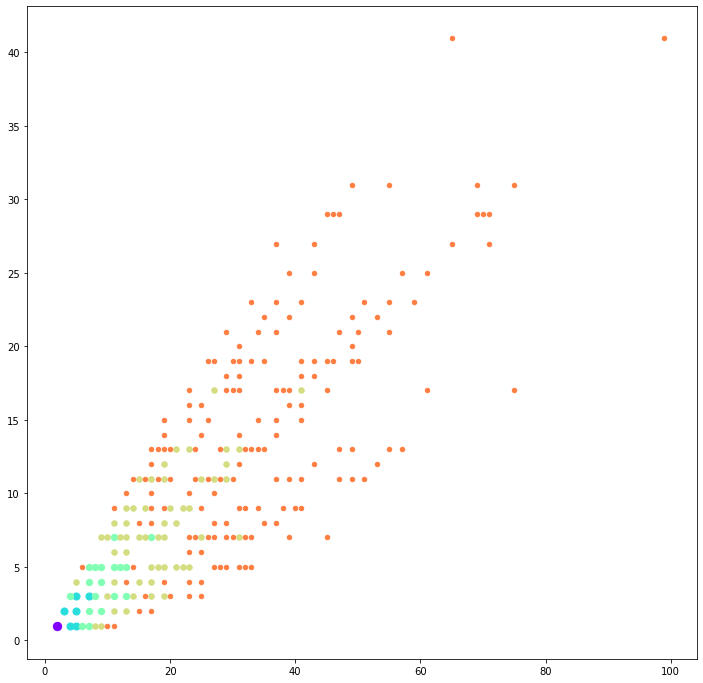

In [4]:
x = []
y = []
colors = cm.rainbow(np.linspace(0, 1, 7))
size = np.linspace(70,10,7)
plt.figure(figsize=(12,12))
plt.scatter(2,1,color=colors[0], s=size[0])
def coprime_gen(lim, cnt, m=2, n=1):
    
    cnt += 1
    x.append(2*m-n)
    x.append(2*m+n)
    x.append(m+2*n)
    y.append(m)
    y.append(m)
    y.append(n)
    plt.scatter(x,y, color=colors[cnt+1],s=size[cnt+1])
    x.clear()
    y.clear()
    if lim == cnt:
        return x,y
    else:
        coprime_gen(lim, cnt, 2*m-n, m)
        coprime_gen(lim,cnt, 2*m+n, m)
        coprime_gen(lim,cnt, m+2*n, n)
    
    

coprime_gen(4, 0, 3, 1)
coprime_gen(4, 0, 2, 1)
        


plt.show()
       


## 3. Write a program to explore the Collatz conjecture

* https://www.youtube.com/watch?v=5mFpVDpKX70
* https://en.wikipedia.org/wiki/Collatz_conjecture#Statement_of_the_problem

In [3]:
import matplotlib.pyplot as plt
import numpy as np


what number would you like to perform the Collatz conjecture on? 147


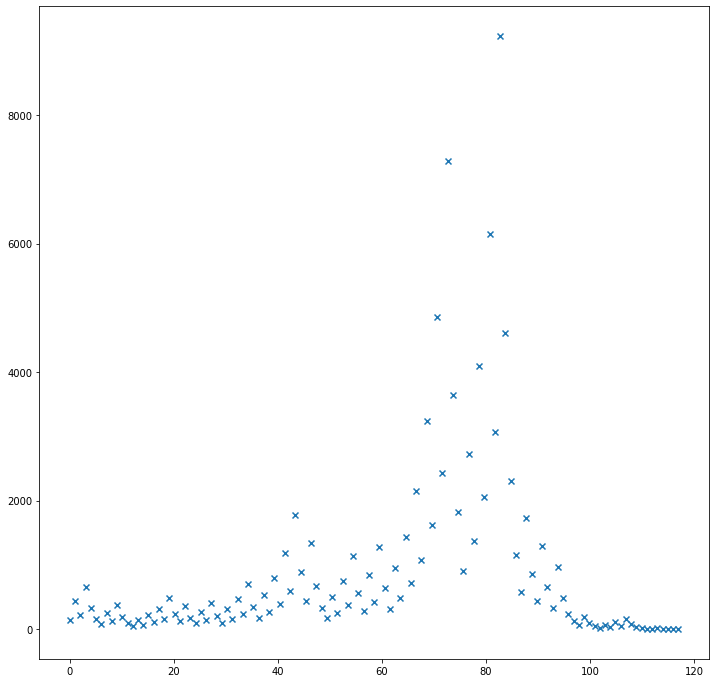

In [34]:
collatz_nums = []

def collatz(num, vec_collatz):
    vec_collatz.append(int(num))
    if num == 1.0: 
        return vec_collatz
    elif num % 2 == 0:
        return collatz(num/2, vec_collatz)
    elif num % 2 == 1: 
        return collatz(3*num +1, vec_collatz)
n = int(input('what number would you like to perform the Collatz conjecture on? '))
collatz(n, collatz_nums)
x_axis = np.linspace(0, len(collatz_nums), len(collatz_nums))
plt.figure(figsize=([12,12]))
plt.scatter(x_axis, collatz_nums, marker='x')
plt.show()
    

In [49]:
x_range = []
max_vec = []
temp_vec =[]

for ii in range(1,10000):
    x_range.append(ii)
    collatz(ii, temp_vec)
    max_vec.append(max(temp_vec))
    temp_vec =[]

plt.figure(figsize=([12,12]))
plt.scatter(x_range, max_vec) 
plt.ylim((0, 100000))
plt.show()

## 4. Build Pascal's triangle and output the formatted triangle to the terminal
Pascal's triangle starts with a single 1 at the top, then each row after that is built from the previous one, where the first and last number on the row are the first and last number of the previous row, and each number in-between is the sum of the two numbers to the left and righ on the previous row. The n<sup>th</sup> row has n numbers on it. It looks like this:

<code>
    1
   1 1
  1 2 1
 1 3 3 1
1 4 6 4 1
...
</code>

## 5. Solve the 8 Queen's Problem
How can you place eight chess queens on an 8×8 chessboard so that no two queens threaten each other?

eg. 
<img src="https://rosettacode.org/mw/images/b/bd/N_queens_problem.png" width=200px>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def check_loc(loc, board):
    for i, j in board:
        print(i,j)
    
def chess_board():
    '''ONELNIE DESCRIPTION'''
    board = np.zeros((8,8))
    # lets start with one queen in the corner
    queens = []
    q1 = (0,0) # we will express each of our queens as tuples 
    queens.append(q1)
    board[q1] = 1
    
    # now, lets say the 'line of attack' for our queens are made up of twos
    check_loc(q1, board)

chess_board()


ValueError: too many values to unpack (expected 2)

In [43]:
def leap_year(year):
    if year % 4 == 0 and year % 100 != 0:
        return True
    elif year % 400 == 0:
        return True
    else: 
        return False
years = [i for i in range(1997, 2019+1)]

for year in years:
    if leap_year(year):
        print(year)

2000
2004
2008
2012
2016


For visualization of the board, check out http://matplotlib.org/examples/pylab_examples/matshow.html

## 6. English number words

On financial documents (like cheques) sometimes it is required to write out numbers in full words, i.e. **175 = one hundred and seventy five**.  Write a program that takes a non-negative integer from the command line and outputs the result in words with propper formatting.

## 7. The Knapsack Problem
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/1182px-Knapsack.svg.png" width=400px>


There is a knapsack of capacity $c>0$ and $N$ items.  Each item has a value $v_i > 0$ and a weight $w_i>0$.  Find the slection of items ($\delta_i = 1$ if selected and $\delta_i=0$ if not) that fit with the total value maximized:
\begin{align}
c &\ge \sum_{i=1}^N \delta_i w_i  \\
V &= \max_{\delta} \left [ \sum_{i=1}^N \delta_i v_i\right]
\end{align}